## Hierarchical Clustering

### Hierarchical Clustering - Aggloamarative Clustering

In [8]:
# the following things will be applicable for both the types of hierarchical clustering

The distance used for this algorithm is __Euclidean Distance__

<img src="images\\Hierarchical_Clustering_Euclidean_Distance.png" alt="image" width="500px">

## lets understand this type of distance measuring techniques

<img src="images\\Hierarchical_Clustering_Single_Linkage.png" alt="image" width="500px" border="1px">
<img src="images\\Hierarchical_Clustering_Complete_Linkage.png" alt="image" width="500px" border="1px">
<img src="images\\Hierarchical_Clustering_Average_Linkage.png" alt="image" width="500px" border="1px">
<img src="images\\Hierarchical_Clustering_Centroid_Linkage.png" alt="image" width="500px" border="1px">

# Sample Example

In [27]:
# Lets have a simple example

<img src="images\\Hierarchical_Clustering_Sample_Example.png" alt="image" width="500px">

In [29]:
# Euclidean matrix is showing distance of each record from other records

<img src="images\\Hierarchical_Clustering_Sample_Example_Step1.png" alt="image" width="500px">

<img src="images\\Hierarchical_Clustering_Sample_Example_Step2.png" alt="image" width="500px">

<img src="images\\Hierarchical_Clustering_Sample_Example_Result.png" alt="image" width="500px">

# Sample Example 2

<img src="images\\Hierarchical_Clustering_Sample_Example2.png" alt="image" width="500px">

<img src="images\\Hierarchical_Clustering_Sample_Example2_Distance.png" alt="image" width="500px">

<img src="images\\Hierarchical_Clustering_Sample_Example2_Standardization.png" alt="image" width="500px">

In [42]:
# After Standardizing 

<img src="images\\Hierarchical_Clustering_Sample_Example2_Distance2.png" alt="image" width="500px">

In [47]:
# Now looks better

<img src="images\\Hierarchical_Clustering_For_Binary.png" alt="image" width="700px" border="1px">
<img src="images\\Hierarchical_Clustering_For_Mixed.png" alt="image" width="700px" border="1px">

<img src="images\\Hierarchical_Clustering_Dendrogram.png" alt="image" width="500px">

<img src="images\\Hierarchical_Clustering_Dendrogram1.png" alt="image" width="500px">

# Coding Example

#### We will take the same dataset that is of universities

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# importing required packages for hierarchical clustering

import scipy.cluster.hierarchy as sch       # to build dendrogram and plotting
from sklearn.cluster import AgglomerativeClustering

In [69]:
df = pd.read_csv("Datasets\\Universities.csv")
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [71]:
# Customized / user defined Normalization function
# Here we can use built-in functions as well from sklearn but to show you how we can write customized function we used this code
def norm_func(i): # function name is norm_func, we can give any name here.
    x = (i-i.min())/(i.max()-i.min()) # (Xi-min)/range (Feature Scaling), Range=max-min
    return x

In [87]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:]) # from 1st column because 0 index col is univ names and we don't need that column
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


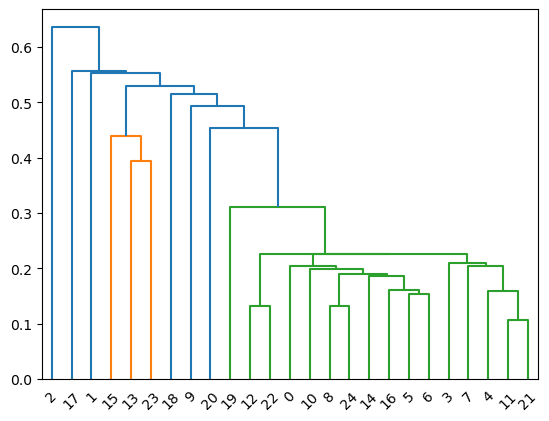

In [99]:
# create dendrogram

dendrogram = sch.dendrogram(sch.linkage(df_norm,method='single'))   # try diff linkages, graph will change

In [101]:
# Create clusters , take number of clusters as 4

hc = AgglomerativeClustering(n_clusters=4,metric="euclidean",linkage='single')   # try diff metric and linkages

In [103]:
# save clusters for chart

y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [107]:
# these are all predicted values

# Data point 0 belongs to 0th cluster, Data point 1 belongs to 3rd cluster and so on

In [109]:
df['Cluster'] = y_hc

In [111]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [119]:
# lets check university and respective cluster
df.loc[:,['Univ','Cluster']]

,Univ,Cluster
0,Brown,0
1,CalTech,3
2,CMU,1
3,Columbia,0
4,Cornell,0
5,Dartmouth,0
6,Duke,0
7,Georgetown,0
8,Harvard,0
9,JohnsHopkins,0
